In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Importing Necessary Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer


# Loading HLES_dog_owner csv


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/DAP_2021_HLES_dog_owner_v1.0.csv')
df.head(5)


<ipython-input-4-e5c1b95a46ac>:1: DtypeWarning: Columns (5,21,75,77,79,81,83,85,87,89,191,192,193,194,195,196,197,198,199,200,201,204,214,285,295,516,566) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/DAP_2021_HLES_dog_owner_v1.0.csv')


,dog_id,owner_id,st_hles_completion_date,dd_breed_pure_or_mixed,dd_breed_pure,dd_breed_pure_non_akc,dd_breed_mixed_primary,dd_breed_mixed_secondary,dd_age_years,dd_age_basis,...,oc_primary_residence_state,oc_primary_residence_census_division,oc_primary_residence_ownership,oc_primary_residence_ownership_other_description,oc_primary_residence_time_percentage,oc_secondary_residence,oc_secondary_residence_state,oc_secondary_residence_ownership,oc_secondary_residence_ownership_other_description,oc_secondary_residence_time_percentage
0,10509,14660,2020-10-17,2,NaN,NaN,16.0,999.0,16.333333,2,...,MO,4.0,2,NaN,NaN,False,NaN,NaN,NaN,NaN
1,74227,16755,2020-10-26,2,NaN,NaN,133.0,12.0,1.833333,1,...,MD,5.0,2,NaN,NaN,False,NaN,NaN,NaN,NaN
2,32487,8568,2020-09-07,1,159.0,NaN,NaN,NaN,13.000000,3,...,VA,5.0,1,NaN,NaN,False,NaN,NaN,NaN,NaN
3,63150,5380,2020-08-21,2,NaN,NaN,999.0,999.0,13.000000,3,...,CA,9.0,2,NaN,NaN,False,NaN,NaN,NaN,NaN
4,33369,15957,2020-10-23,2,NaN,NaN,230.0,82.0,2.166667,1,...,OH,3.0,2,NaN,NaN,False,NaN,NaN,NaN,NaN


In [ ]:
#Printing the shape of HLES_dog_owner dataframe

df.shape

(33172, 658)

## Null Count for all the columns

In [ ]:
#This code prints out the count of NULL/NaN value in each columns of the dataset

column_list= list(df.columns)
column_list

for i in column_list:
  null_count =df[i].isnull().isna().sum()
  # print(f"{i} = {null_count}")

# Loading DAP_2021_CSLB_v1.0 csv

In [ ]:
df2= pd.read_csv('/content/drive/MyDrive/DAP_2021_CSLB_v1.0.csv')

#Set dog_id column as the Dataframe Index Column

cslb2 =df2.set_index('dog_id')

# generate a new dataframe name cslb only consiting of the cslb_score column

cslb= cslb2.loc[:,['cslb_score']]
cslb.head()



,cslb_score
dog_id,
7822,34
34469,34
48340,42
76104,37
16972,33


In [ ]:
#printing the shape of cslb dataframe
cslb.shape

(39400, 1)

# Index assign



In [ ]:
#assign the dog_id column as Index for df dataframe and store it in a new variable named 'index_df'
index_df =df.set_index('dog_id')
index_df.head(5)


,owner_id,st_hles_completion_date,dd_breed_pure_or_mixed,dd_breed_pure,dd_breed_pure_non_akc,dd_breed_mixed_primary,dd_breed_mixed_secondary,dd_age_years,dd_age_basis,dd_age_exact_source_acquired_as_puppy,...,oc_primary_residence_state,oc_primary_residence_census_division,oc_primary_residence_ownership,oc_primary_residence_ownership_other_description,oc_primary_residence_time_percentage,oc_secondary_residence,oc_secondary_residence_state,oc_secondary_residence_ownership,oc_secondary_residence_ownership_other_description,oc_secondary_residence_time_percentage
dog_id,,,,,,,,,,,,,,,,,,,,,
10509,14660,2020-10-17,2,NaN,NaN,16.0,999.0,16.333333,2,False,...,MO,4.0,2,NaN,NaN,False,NaN,NaN,NaN,NaN
74227,16755,2020-10-26,2,NaN,NaN,133.0,12.0,1.833333,1,True,...,MD,5.0,2,NaN,NaN,False,NaN,NaN,NaN,NaN
32487,8568,2020-09-07,1,159.0,NaN,NaN,NaN,13.000000,3,NaN,...,VA,5.0,1,NaN,NaN,False,NaN,NaN,NaN,NaN
63150,5380,2020-08-21,2,NaN,NaN,999.0,999.0,13.000000,3,NaN,...,CA,9.0,2,NaN,NaN,False,NaN,NaN,NaN,NaN
33369,15957,2020-10-23,2,NaN,NaN,230.0,82.0,2.166667,1,True,...,OH,3.0,2,NaN,NaN,False,NaN,NaN,NaN,NaN


A new dataframe [exp_df] is created with some specific columns / varibales

In [ ]:
#exp df consists of some specified columns from the actual Dataframe df
exp_df = index_df.loc[:,["dd_age_years",'dd_sex', 'dd_weight_lbs','dd_breed_pure_or_mixed','dd_breed_pure', 'dd_spayed_or_neutered', 'df_diet_consistency', 'df_feedings_per_day', 'df_daily_supplements_omega3', 'df_primary_diet_component' ]]
exp_df.head()


,dd_age_years,dd_sex,dd_weight_lbs,dd_breed_pure_or_mixed,dd_breed_pure,dd_spayed_or_neutered,df_diet_consistency,df_feedings_per_day,df_daily_supplements_omega3,df_primary_diet_component
dog_id,,,,,,,,,,
10509,16.333333,2,33.0,2,NaN,True,1,2,NaN,1
74227,1.833333,2,44.0,2,NaN,True,1,2,NaN,4
32487,13.000000,1,20.0,1,159.0,True,1,2,0.0,1
63150,13.000000,1,65.0,2,NaN,True,1,2,0.0,2
33369,2.166667,1,34.8,2,NaN,True,1,2,NaN,1


In [ ]:
#calculate no of values in column for any given condition
len(exp_df[exp_df['dd_breed_pure']==3]) #calculate no of value '3' in dd_breed_pure column

51

In [ ]:
exp_df.shape

(33172, 10)

#unwanted variables exclusion
Dataframe filtered on dd_age_years Criteria

In [ ]:
#Dataframe filtered on dd_age_years Criteria and df_diet_consistency and Stored in a new df named 'data'

clean = (exp_df["dd_age_years"]>1) & (exp_df["dd_age_years"]<18) & (exp_df['dd_spayed_or_neutered'] == True) & (exp_df['df_diet_consistency'] != 3)
data = exp_df[clean]
data.head()

,dd_age_years,dd_sex,dd_weight_lbs,dd_breed_pure_or_mixed,dd_breed_pure,dd_spayed_or_neutered,df_diet_consistency,df_feedings_per_day,df_daily_supplements_omega3,df_primary_diet_component
dog_id,,,,,,,,,,
10509,16.333333,2,33.0,2,NaN,True,1,2,NaN,1
74227,1.833333,2,44.0,2,NaN,True,1,2,NaN,4
32487,13.000000,1,20.0,1,159.0,True,1,2,0.0,1
63150,13.000000,1,65.0,2,NaN,True,1,2,0.0,2
33369,2.166667,1,34.8,2,NaN,True,1,2,NaN,1


In [ ]:
data.shape, cslb.shape

((29247, 10), (39400, 1))

#merging cslb score variable from cslb csv file

dog_owner datafram[df] and cslb dataframes are merged

In [ ]:
#datafrma 'data' and 'cslb' merged and Stored in a New variable named "final"
final = pd.merge(data, cslb, on='dog_id', how='inner', copy = False)
final.head()

,dd_age_years,dd_sex,dd_weight_lbs,dd_breed_pure_or_mixed,dd_breed_pure,dd_spayed_or_neutered,df_diet_consistency,df_feedings_per_day,df_daily_supplements_omega3,df_primary_diet_component,cslb_score
dog_id,,,,,,,,,,,
10509,16.333333,2,33.0,2,NaN,True,1,2,NaN,1,35
74227,1.833333,2,44.0,2,NaN,True,1,2,NaN,4,34
74227,1.833333,2,44.0,2,NaN,True,1,2,NaN,4,34
32487,13.000000,1,20.0,1,159.0,True,1,2,0.0,1,35
32487,13.000000,1,20.0,1,159.0,True,1,2,0.0,1,35


In [ ]:
final.shape

(35142, 11)

In [ ]:
# if we have duplicates in the column Dog_id we drop the entire row and the new dataframe generated is stored as df1

df1 = final.reset_index().drop_duplicates(subset='dog_id',
                                       keep='first').set_index('dog_id')

In [ ]:
df1.head()
# Final data frame to work with

,dd_age_years,dd_sex,dd_weight_lbs,dd_breed_pure_or_mixed,dd_breed_pure,dd_spayed_or_neutered,df_diet_consistency,df_feedings_per_day,df_daily_supplements_omega3,df_primary_diet_component,cslb_score
dog_id,,,,,,,,,,,
10509,16.333333,2,33.0,2,NaN,True,1,2,NaN,1,35
74227,1.833333,2,44.0,2,NaN,True,1,2,NaN,4,34
32487,13.000000,1,20.0,1,159.0,True,1,2,0.0,1,35
63150,13.000000,1,65.0,2,NaN,True,1,2,0.0,2,44
33369,2.166667,1,34.8,2,NaN,True,1,2,NaN,1,34


In [ ]:
df1.shape, df1.size

((22136, 11), 243496)

In [ ]:
# Replacing NaN value in df1 dataframe with 0

df1.replace(np.nan, 0, inplace=True)

In [ ]:
# for value in df1['dd_breed_pure']:
#     print(value)

# Value Count of Column dd_breed_pure

In this part we computed the number of dogs for all the breeds and Printing out the breeds that contains more than 10 dogs.

In [ ]:
value_counts = df1['dd_breed_pure'].value_counts()  # Calculate value counts
for value, count in value_counts.items():
    if count > 10:
        print(f"Value {value} occurs {count}")

Excluding the Breed Sample if Value_count_dd_pure_breed is less than 10

In [ ]:
value_counts = df1['dd_breed_pure'].value_counts()

# Loop through the unique values in the 'dd_breed_pure' and delete rows where count is 0
for value in value_counts.index:
    if value_counts[value] < 10:
        df1 = df1[df1['dd_breed_pure'] != value]

df1.head()

,dd_age_years,dd_sex,dd_weight_lbs,dd_breed_pure_or_mixed,dd_breed_pure,dd_spayed_or_neutered,df_diet_consistency,df_feedings_per_day,df_daily_supplements_omega3,df_primary_diet_component,cslb_score
dog_id,,,,,,,,,,,
10509,16.333333,2,33.0,2,0.0,True,1,2,0.0,1,35
74227,1.833333,2,44.0,2,0.0,True,1,2,0.0,4,34
32487,13.000000,1,20.0,1,159.0,True,1,2,0.0,1,35
63150,13.000000,1,65.0,2,0.0,True,1,2,0.0,2,44
33369,2.166667,1,34.8,2,0.0,True,1,2,0.0,1,34


In [ ]:
df1.shape

(21796, 11)

df1 shape reduced from (22136, 11) to (21796, 11)

In [ ]:
#Printing out the catogical variables and numerical variables

cat_cols=df1.select_dtypes(include=['object']).columns
num_cols = df1.select_dtypes(include=np.number).columns.tolist()
print(f"Categorical Variables:{cat_cols}")
# print(cat_cols)
print(f"Numerical Variables:{num_cols}")
# print(num_cols)

Categorical Variables:Index([], dtype='object')
Numerical Variables:['dd_age_years', 'dd_sex', 'dd_weight_lbs', 'dd_breed_pure_or_mixed', 'dd_breed_pure', 'df_diet_consistency', 'df_feedings_per_day', 'df_daily_supplements_omega3', 'df_primary_diet_component', 'cslb_score']


# Detecting Outliers

dd_age_years
Skew : 0.24


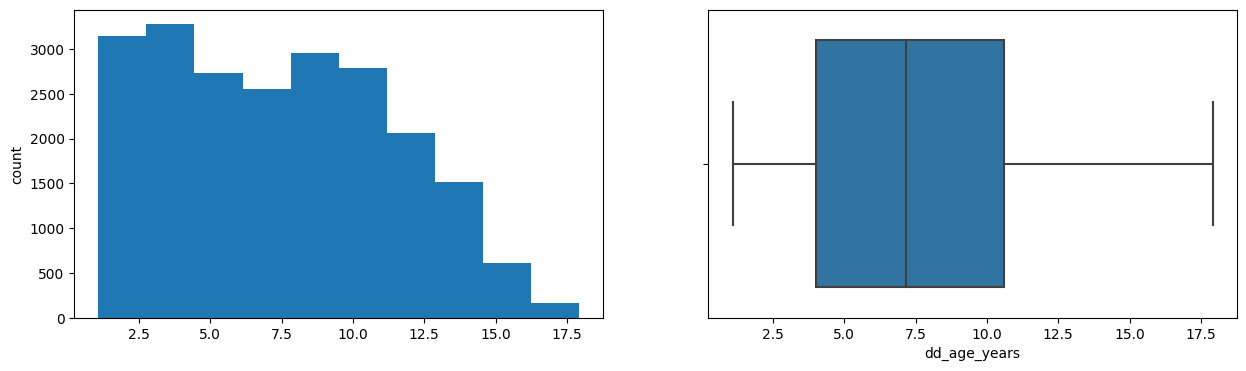

dd_sex
Skew : -0.06


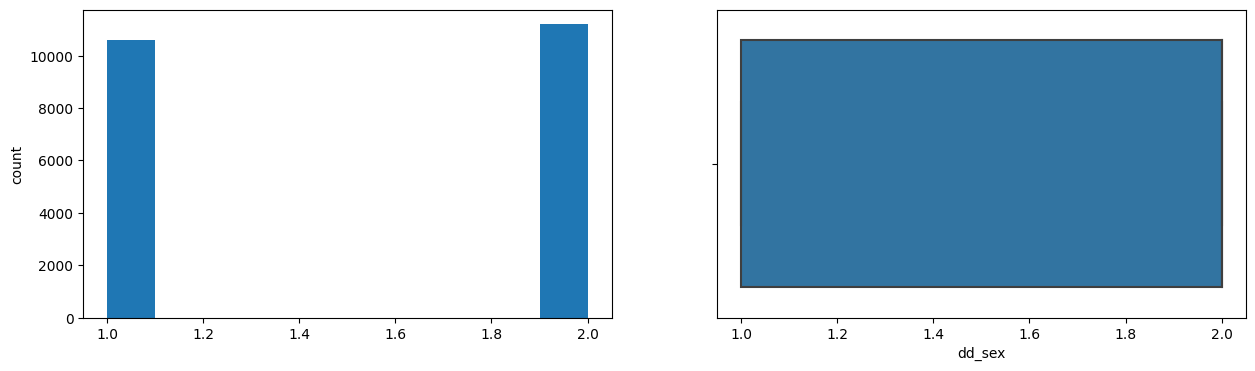

dd_weight_lbs
Skew : 0.65


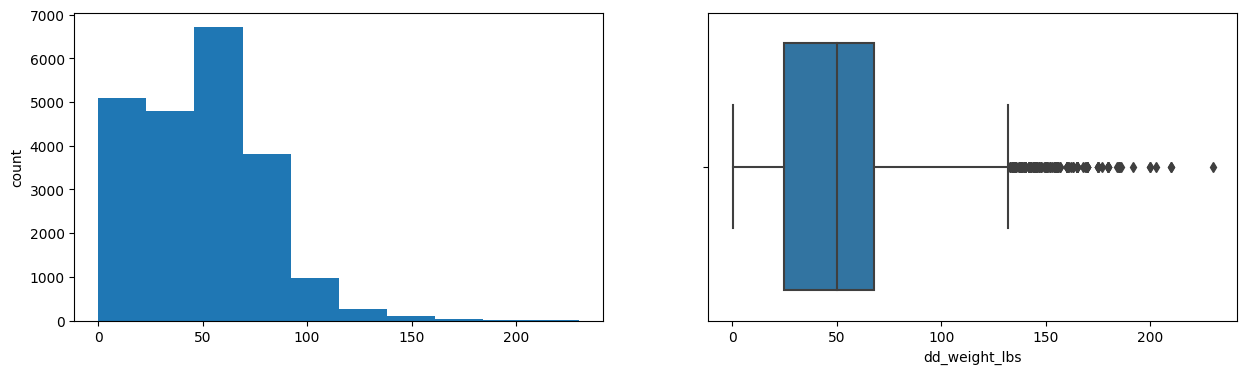

dd_breed_pure_or_mixed
Skew : -0.15


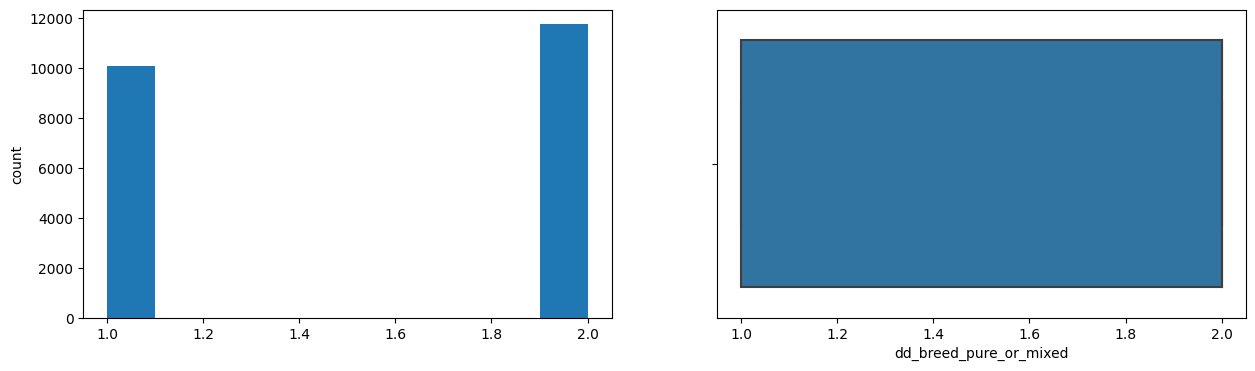

dd_breed_pure
Skew : 1.04


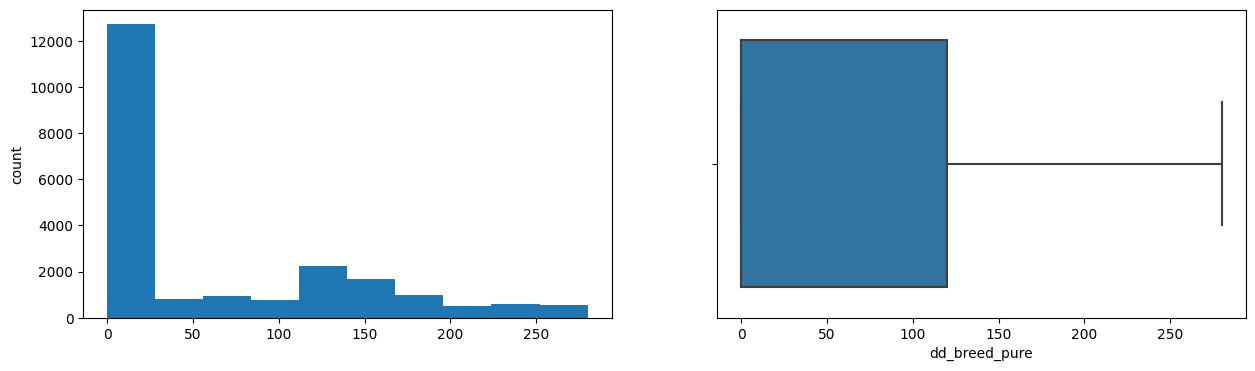

df_diet_consistency
Skew : 34.19


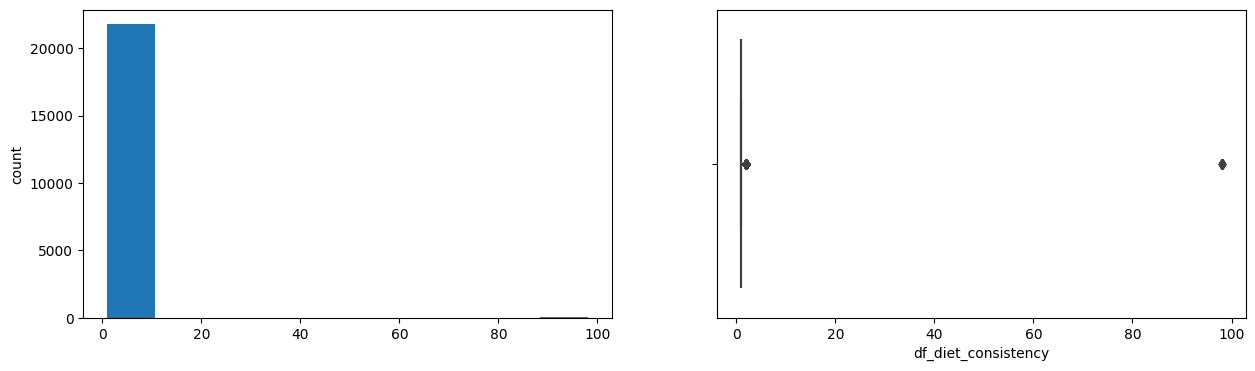

df_feedings_per_day
Skew : 1.35


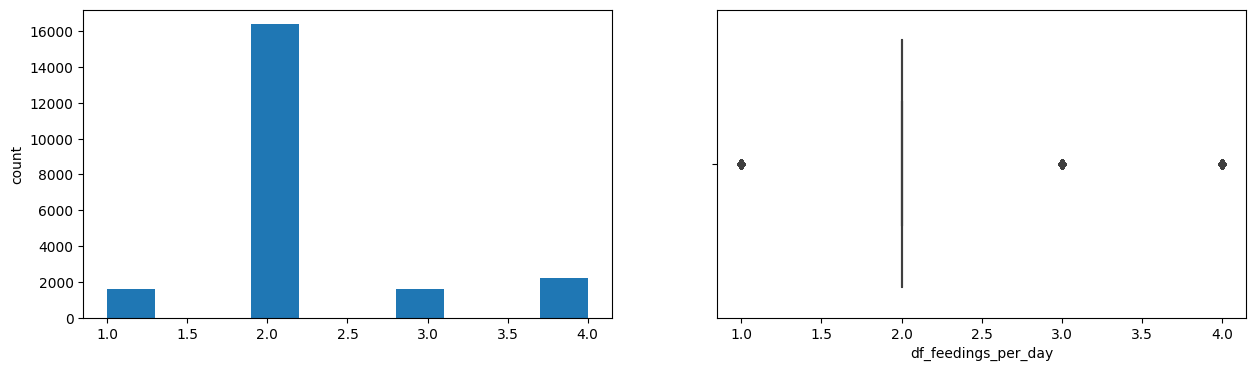

df_daily_supplements_omega3
Skew : 1.44


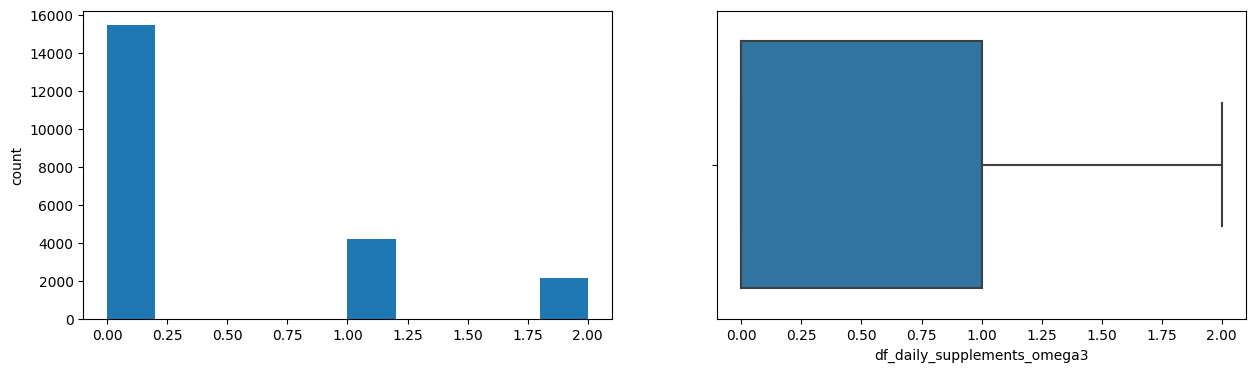

df_primary_diet_component
Skew : 7.06


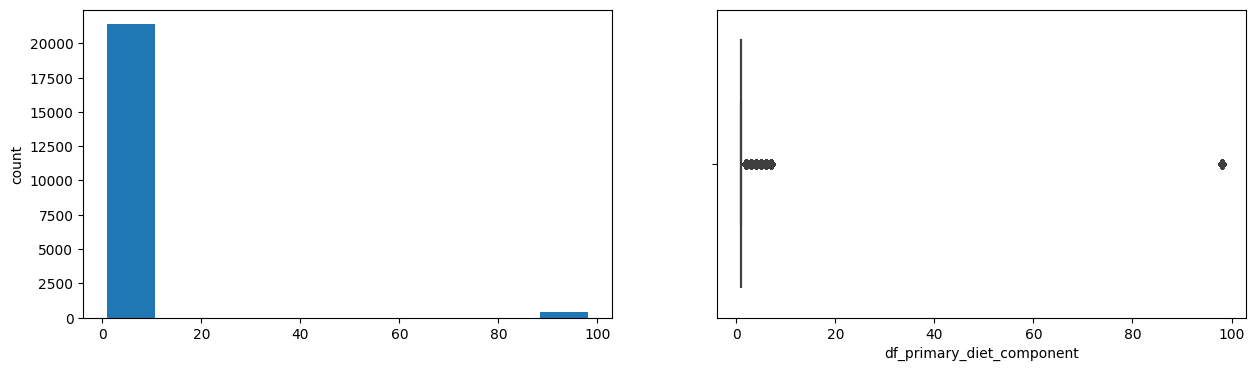

cslb_score
Skew : 0.61


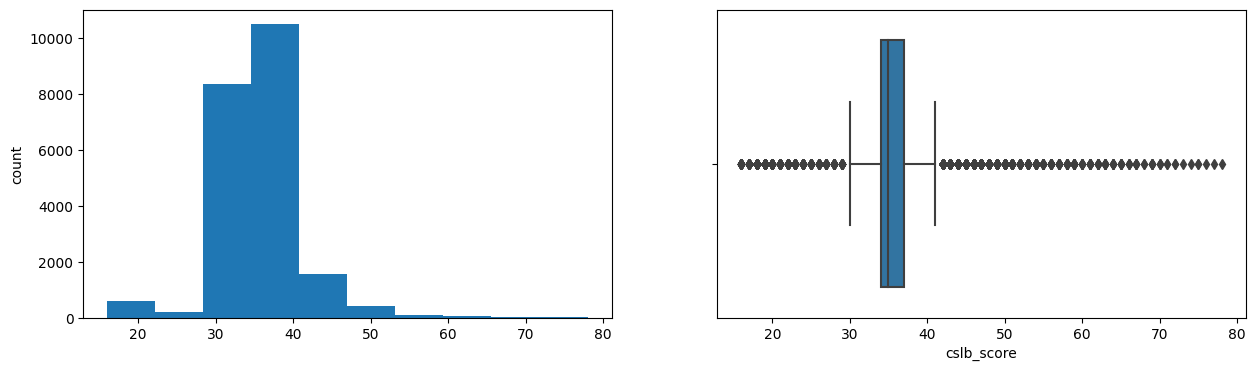

In [ ]:
# this for loop will iterate through all numerical columns and show a histogram and boxplot for each columns

for col in num_cols:
    print(col)
    print('Skew :', round(df1[col].skew(), 2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    df1[col].hist(grid=False)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    seaborn.boxplot(x=df1[col])
    plt.show()

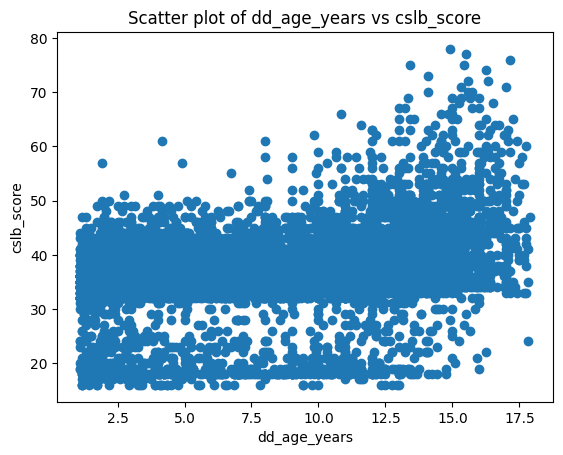

In [ ]:
# Plotting a scatter graph for 'Column1' vs 'Column2'
plt.scatter(df1['dd_age_years'],df1['cslb_score'])
plt.xlabel('dd_age_years')
plt.ylabel('cslb_score')
plt.title('Scatter plot of dd_age_years vs cslb_score')
plt.show()

In [ ]:
column_type = df1['df_feedings_per_day'].dtype
column_type

dtype('int64')

In [ ]:
df1["df_feedings_per_day"].unique()

array([2, 3, 4, 1])

# Distribution Normality checking

(array([1454., 1690., 1712., 1565., 1378., 1349., 1108., 1451., 1442.,
        1511., 1418., 1366., 1233.,  826.,  903.,  617.,  372.,  237.,
         115.,   49.]),
 array([ 1.08333333,  1.925     ,  2.76666667,  3.60833333,  4.45      ,
         5.29166667,  6.13333333,  6.975     ,  7.81666667,  8.65833333,
         9.5       , 10.34166667, 11.18333333, 12.025     , 12.86666667,
        13.70833333, 14.55      , 15.39166667, 16.23333333, 17.075     ,
        17.91666667]),
 <BarContainer object of 20 artists>)

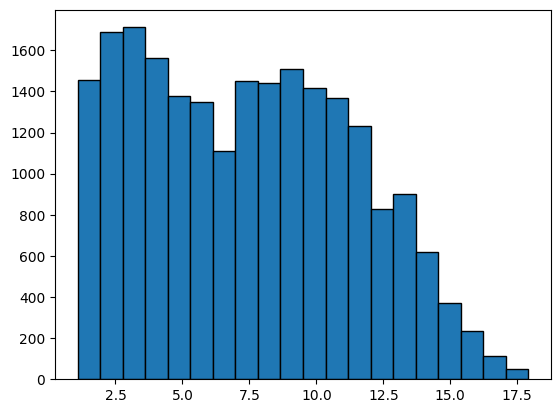

In [ ]:
import math
import numpy as np
from scipy.stats import lognorm
import matplotlib.pyplot as plt

#make this example reproducible
np.random.seed(1)

#generate dataset that contains 1000 log-normal distributed values
lognorm_dataset = lognorm.rvs(s=.5, scale=math.exp(1), size=1000)

#create histogram to visualize values in dataset
plt.hist(df1["dd_age_years"], edgecolor='black', bins=20)

Alternate way to check distribution normality

In [ ]:
alpha=0.05
from scipy import stats
# We pass groups to the criterion for testing
stat, pval = stats.shapiro(df1['dd_age_years'])

print('Statistic:', f'{stat:.3f}')
print('P-Value:', f'{pval:.20f}')

# Checking the condition for accepting or rejecting H0
if pval > alpha:
    print('Accept H0 - Data is distributed normally.')
if pval < alpha:
    print('Reject H0 - Data is not distributed normally.')

Statistic: 0.965
P-Value: 0.00000000000000000000
Reject H0 - Data is not distributed normally.


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Log tranformation for Non_Normal Distribution

In [ ]:
# Function for log transformation of the column
def log_transform(data,col):
    for colname in col:
        if (data[colname] == 1).all():
            data[colname + '_log1'] = np.log(data[colname]+1)
        else:
            data[colname + '_log1'] = np.log(data[colname])
    data.info()

In [ ]:
log_transform(df1,['dd_age_years',])

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21796 entries, 10509 to 6530
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   dd_age_years                 21796 non-null  float64
 1   dd_sex                       21796 non-null  int64  
 2   dd_weight_lbs                21796 non-null  float64
 3   dd_breed_pure_or_mixed       21796 non-null  int64  
 4   dd_breed_pure                21796 non-null  float64
 5   dd_spayed_or_neutered        21796 non-null  bool   
 6   df_diet_consistency          21796 non-null  int64  
 7   df_feedings_per_day          21796 non-null  int64  
 8   df_daily_supplements_omega3  21796 non-null  float64
 9   df_primary_diet_component    21796 non-null  int64  
 10  cslb_score                   21796 non-null  int64  
 11  dd_age_years_log1            21796 non-null  float64
dtypes: bool(1), float64(5), int64(6)
memory usage: 2.0 MB


<ipython-input-38-cb3e7247f506>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  seaborn.distplot(df1['dd_age_years'])


<Axes: xlabel='dd_age_years', ylabel='Density'>

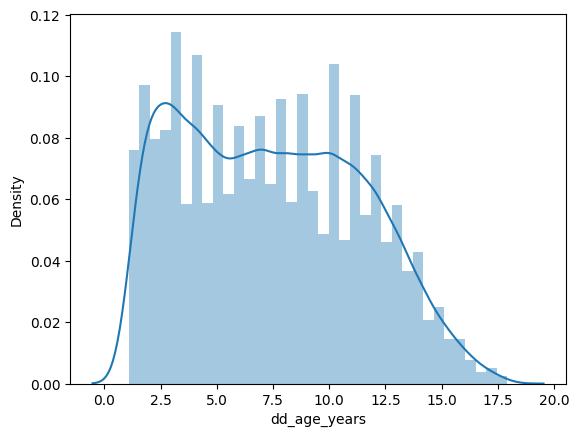

In [ ]:
seaborn.distplot(df1['dd_age_years'])

In [ ]:
# seaborn.distplot(df1['cslb_score'], axlabel="cslb_score")

###

In [ ]:
# fit lognormal distribution
# shape, loc, scale = stats.lognorm.fit(df1['dd_age_years'], loc=0)
# pdf_lognorm = stats.lognorm.pdf(df1["dd_age_years"], shape, loc, scale)

In [ ]:
# # visualize

# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))

# ax1.hist(df1["dd_age_years"], bins='auto', density=True)
# ax1.plot(df1["dd_age_years"], pdf_lognorm)
# ax1.set_ylabel('probability')
# ax1.set_title('Linear Scale')

# ax2.hist(df1["dd_age_years"], bins='auto', density=True)
# ax2.plot(df1["dd_age_years"], pdf_lognorm)
# ax2.set_xscale('log')
# ax2.set_title('Log Scale')

# plt.show()


#Hypothesis Analysis 1
$H0 = CSLB score doesnot vary w.r.t Feeding Frequency
Ha = **CSLB** score varries w.r.t Feeding Frequency


---

The null hypothesis `(H0)` is that there is no difference among group means. The alternative hypothesis (`Ha)` is that at least one group differs significantly from the overall mean of the dependent variable



Forming Samples for Hypothesis test 1
Feeding Freq vs Cslb score


In [ ]:
#in df1 dataframe we have 4 level of response for df_feedinngs_per_day

zero_df = df1[df1["df_feedings_per_day"] == 1]["cslb_score"]
one_df = df1[df1["df_feedings_per_day"] == 2]["cslb_score"]
two_df = df1[df1["df_feedings_per_day"]== 3]["cslb_score"]
three_df = df1[df1["df_feedings_per_day"]== 4]["cslb_score"]

In [ ]:
# zero_df,one_df, two_df, three_df

In [ ]:
from scipy.stats import f_oneway

f_statistic, p_value = f_oneway(zero_df, one_df,two_df, three_df)

# Print the results
print("F-statistic:", f_statistic)
print("p-value:", p_value)

alpha = 0.05
if p_value > alpha:
  print(f" pvalue'{p_value}' > '{alpha}'alpha. So we do not reject Null Hypothesis")
else:
  print(f" pvalue'{p_value}' < '{alpha}'alpha. So we reject Null Hypothesis")

F-statistic: 6.640712832418927
p-value: 0.00017689523899603712
 pvalue'0.00017689523899603712' < '0.05'alpha. So we reject Null Hypothesis


# Hypothesis Analysis 2

H0 = feeding freq doesnot differs w.r.t age  mu1 = mu2 = mu3.. ...
Ha = feeding freq differ w.r.t age mum =! mu1

---
Null and Alternate hypothesis stays same as explained in Hypothesis test 1


Forming sample for hypothesis test


In [ ]:
zero_df_age = df1[df1["df_feedings_per_day"] == 1]["dd_age_years"]
one_df_age = df1[df1["df_feedings_per_day"] == 2]["dd_age_years"]
two_df_age = df1[df1["df_feedings_per_day"]== 3]["dd_age_years"]
three_df_age = df1[df1["df_feedings_per_day"]== 4]["dd_age_years"]

In [ ]:
# zero_df_age, one_df_age, two_df_age, three_df_age

In [ ]:
from scipy.stats import f_oneway

f_statistic, p_value = f_oneway(zero_df_age, one_df_age,two_df_age, three_df_age)

# Print the results
print("F-statistic:", f_statistic)
print("p-value:", p_value)

alpha = 0.05
if p_value > alpha:
  print(f" pvalue'{p_value}' > '{alpha}'alpha. So we do not reject Null Hypothesis")
else:
  print(f" pvalue'{p_value}' < '{alpha}'alpha. So we reject Null Hypothesis")

F-statistic: 10.860056754659137
p-value: 3.9944747434371664e-07
 pvalue'3.9944747434371664e-07' < '0.05'alpha. So we reject Null Hypothesis


So we accept alternate hypothesis which is Feedin Frequency for a dog varies with respect to the age of the dogs


# Hypothesis Analysis 3

we have two levels in dog breed. 1 for Pure and 2 for  MIxed breed dog.
our null hypothesis is mean of cslb score for pure breed dog is equal to the that of MIxed Breed dogs.

In [ ]:
#checking the values in dd_breed_pure_or_mixed column

df1["dd_breed_pure_or_mixed"].unique()

array([2, 1])

forming 2 groups for test

In [ ]:
pure_breed_df = df1[df1["dd_breed_pure_or_mixed"] == 1]["cslb_score"]
mixed_breed_df = df1[df1["dd_breed_pure_or_mixed"] == 2]["cslb_score"]

In [ ]:
# pure_breed_df, mixed_breed_df

In [ ]:
from scipy.stats import f_oneway
f_statistic, p_value = f_oneway(pure_breed_df, mixed_breed_df)

# Print the results
print("F-statistic:", f_statistic)
print("p-value:", p_value)

alpha = 0.05
if p_value > alpha:
  print(f" pvalue'{p_value}' > '{alpha}'alpha. So we do not reject Null Hypothesis")
else:
  print(f" pvalue'{p_value}' < '{alpha}'alpha. So we reject Null Hypothesis")

F-statistic: 7.338177608292942
p-value: 0.006755796659857592
 pvalue'0.006755796659857592' < '0.05'alpha. So we reject Null Hypothesis


# Correlation Analysis:

In [ ]:

# calculate the Pearson's correlation between two variables (columns)

from numpy.random import randn
from numpy.random import seed
from scipy.stats import pearsonr
# seed random number generator
seed(12)
# prepare data
data1 = df1["df_feedings_per_day"]
data2 = df1["cslb_score"]

# calculate Pearson's correlation

corr, _ = pearsonr(data1, data2)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.030


In [ ]:

# calculate the spearmans's correlation between two variables
from numpy.random import randn
from numpy.random import seed
from scipy.stats import spearmanr
# seed random number generator
seed(1)

# calculate spearman's correlation
r = np.corrcoef(data1,data2)
print(r)
print(r[0, 1])
print(r[1, 0])

[[1.         0.02995789]
 [0.02995789 1.        ]]
0.029957894865226316
0.029957894865226313


<Axes: xlabel='cslb_score', ylabel='dd_age_years'>

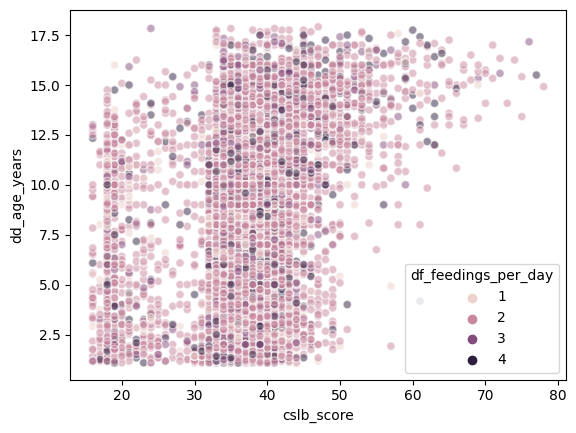

In [ ]:
import seaborn as sns
sns.scatterplot(data = df1, x = data1, y = data2, linewidth = 1.0, alpha = 0.5,hue= "df_feedings_per_day")

<Axes: xlabel='dd_age_years', ylabel='cslb_score'>

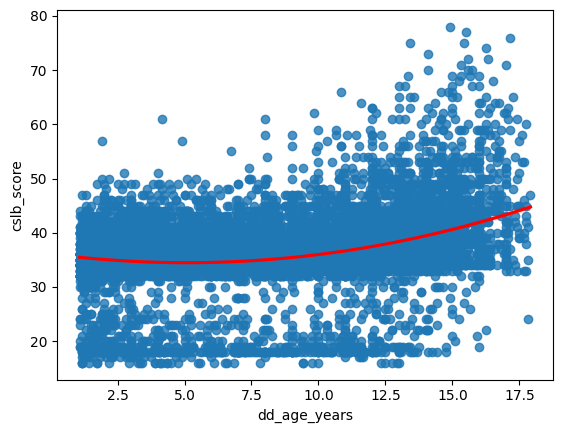

In [ ]:
sns.regplot(data = df1, x = data2, y = data1, line_kws=dict(color="r"),order = 2)

In [ ]:
df1.corr(method ='spearman')

,dd_age_years,dd_sex,dd_weight_lbs,dd_breed_pure_or_mixed,dd_breed_pure,dd_spayed_or_neutered,df_diet_consistency,df_feedings_per_day,df_daily_supplements_omega3,df_primary_diet_component,cslb_score,dd_age_years_log1
dd_age_years,1.000000,0.017984,-0.116003,-0.004557,0.011738,NaN,-0.015300,-0.011774,0.106476,0.118066,0.258140,1.000000
dd_sex,0.017984,1.000000,-0.099949,0.010634,-0.015942,NaN,-0.005922,-0.007422,-0.000903,0.001854,-0.010828,0.017984
dd_weight_lbs,-0.116003,-0.099949,1.000000,-0.070877,0.048275,NaN,-0.045462,-0.058680,0.100492,-0.172233,-0.053327,-0.116003
dd_breed_pure_or_mixed,-0.004557,0.010634,-0.070877,1.000000,-0.940117,NaN,0.044977,0.005630,-0.054929,-0.023676,0.049610,-0.004557
dd_breed_pure,0.011738,-0.015942,0.048275,-0.940117,1.000000,NaN,-0.041601,0.005641,0.046128,0.032005,-0.038187,0.011738
dd_spayed_or_neutered,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
df_diet_consistency,-0.015300,-0.005922,-0.045462,0.044977,-0.041601,NaN,1.000000,0.067873,-0.025597,0.084968,0.076315,-0.015300
df_feedings_per_day,-0.011774,-0.007422,-0.058680,0.005630,0.005641,NaN,0.067873,1.000000,-0.020896,-0.030138,0.034712,-0.011774
df_daily_supplements_omega3,0.106476,-0.000903,0.100492,-0.054929,0.046128,NaN,-0.025597,-0.020896,1.000000,0.078331,-0.002686,0.106476
df_primary_diet_component,0.118066,0.001854,-0.172233,-0.023676,0.032005,NaN,0.084968,-0.030138,0.078331,1.000000,0.018775,0.118066


In [ ]:
df1.corr()[["dd_age_years"]]

,dd_age_years
dd_age_years,1.000000
dd_sex,0.018428
dd_weight_lbs,-0.131602
dd_breed_pure_or_mixed,-0.004703
dd_breed_pure,0.018527
dd_spayed_or_neutered,NaN
df_diet_consistency,0.001274
df_feedings_per_day,-0.009628
df_daily_supplements_omega3,0.093018
df_primary_diet_component,0.043857


Correlation Coeffiecient

In [ ]:

# calculate the spearmans's correlation between two variables
from numpy.random import randn
from numpy.random import seed
from scipy.stats import spearmanr
from scipy.stats import pearsonr

# seed random number generator
seed(12)
# prepare data
data1 = df1["df_feedings_per_day"]
data2 = df1["cslb_score"]

# calculate Pearson's correlation
corr, _ = pearsonr(data1, data2)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.030


In [ ]:
#  Spearmen

result = spearmanr(data1, data2)
print(result)

SignificanceResult(statistic=0.034711692710808886, pvalue=2.9611898893240097e-07)


<Axes: xlabel='df_feedings_per_day', ylabel='cslb_score'>

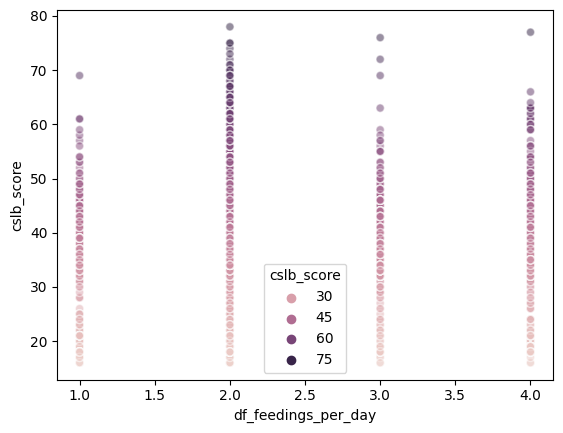

In [ ]:
import seaborn as sns
sns.scatterplot(data = df1, x = data1, y = data2, linewidth = 1.0, alpha = 0.5,hue= "cslb_score")

<Axes: xlabel='df_feedings_per_day', ylabel='cslb_score'>

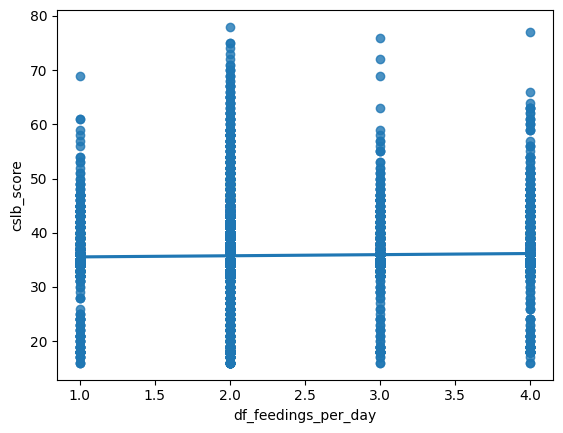

In [ ]:
sns.regplot(data = df1, x = data1, y = data2)

In [ ]:
df1.corr(method ="pearson")

,dd_age_years,dd_sex,dd_weight_lbs,dd_breed_pure_or_mixed,dd_breed_pure,dd_spayed_or_neutered,df_diet_consistency,df_feedings_per_day,df_daily_supplements_omega3,df_primary_diet_component,cslb_score,dd_age_years_log1
dd_age_years,1.000000,0.018428,-0.131602,-0.004703,0.018527,NaN,0.001274,-0.009628,0.093018,0.043857,0.281954,0.952438
dd_sex,0.018428,1.000000,-0.104040,0.010634,-0.019172,NaN,-0.004564,-0.006647,-0.001803,-0.001112,-0.007025,0.014274
dd_weight_lbs,-0.131602,-0.104040,1.000000,-0.086712,0.037065,NaN,-0.003019,-0.066897,0.087651,-0.043428,-0.062879,-0.089983
dd_breed_pure_or_mixed,-0.004703,0.010634,-0.086712,1.000000,-0.808918,NaN,0.008867,0.019995,-0.046892,-0.001850,0.018346,-0.002591
dd_breed_pure,0.018527,-0.019172,0.037065,-0.808918,1.000000,NaN,-0.011190,0.004830,0.030654,0.006988,-0.003404,0.014523
dd_spayed_or_neutered,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
df_diet_consistency,0.001274,-0.004564,-0.003019,0.008867,-0.011190,NaN,1.000000,0.005176,-0.000210,0.072328,0.005027,-0.001349
df_feedings_per_day,-0.009628,-0.006647,-0.066897,0.019995,0.004830,NaN,0.005176,1.000000,-0.035418,-0.017714,0.029958,-0.026051
df_daily_supplements_omega3,0.093018,-0.001803,0.087651,-0.046892,0.030654,NaN,-0.000210,-0.035418,1.000000,0.038826,0.010309,0.091370
df_primary_diet_component,0.043857,-0.001112,-0.043428,-0.001850,0.006988,NaN,0.072328,-0.017714,0.038826,1.000000,0.022239,0.039308


In [ ]:
df1.corr()[["dd_age_years"]]

,dd_age_years
dd_age_years,1.000000
dd_sex,0.018428
dd_weight_lbs,-0.131602
dd_breed_pure_or_mixed,-0.004703
dd_breed_pure,0.018527
dd_spayed_or_neutered,NaN
df_diet_consistency,0.001274
df_feedings_per_day,-0.009628
df_daily_supplements_omega3,0.093018
df_primary_diet_component,0.043857


In [ ]:
df1.corr(method ="spearman")[["dd_age_years"]]

,dd_age_years
dd_age_years,1.000000
dd_sex,0.017984
dd_weight_lbs,-0.116003
dd_breed_pure_or_mixed,-0.004557
dd_breed_pure,0.011738
dd_spayed_or_neutered,NaN
df_diet_consistency,-0.015300
df_feedings_per_day,-0.011774
df_daily_supplements_omega3,0.106476
df_primary_diet_component,0.118066


# Significance of Correlation Co efficient Analysis:

In [ ]:

# calculate the Pearson's correlation between two variables
from numpy.random import randn
from numpy.random import seed
from scipy.stats import pearsonr
# seed random number generator
seed(1)
# prepare data

d1 = df1["dd_age_years"]
d2 = df1["cslb_score"]

# calculate Pearson's correlation
corr, _ = pearsonr(d1, d2)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.282


In [ ]:
import scipy
result = scipy.stats.spearmanr(d1, d2)
print(result)

SignificanceResult(statistic=0.25814045552648957, pvalue=0.0)


In [ ]:
# H0:ρ=0

# Ha:ρ ≠ 0

# α=0.05

Significance of the Correlation analysis

In [ ]:
from scipy.stats import linregress
linregress(d1,d2)

LinregressResult(slope=0.3526834470451293, intercept=33.166423677729135, rvalue=0.2819535433382596, pvalue=0.0, stderr=0.008129268387994564, intercept_stderr=0.06844219882469528)

The p-value
is 0.00 (from LinRegTTest on your calculator or from computer software).
The p-value
, 0.00, is less than the significance level of α=0.05
.
Decision: Reject the Null Hypothesis H0
Conclusion: There is sufficient evidence to conclude that there is a significant linear relationship between the third exam score (x
) and the final exam score (y) because the correlation coefficient is significantly different from zero.

Because r is significant and the scatter plot shows a linear trend, the regression line can be used to predict final cslb
 scores.

# Data Preparation for Linear Regression

In [ ]:
# We will use some methods from the sklearn module
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score

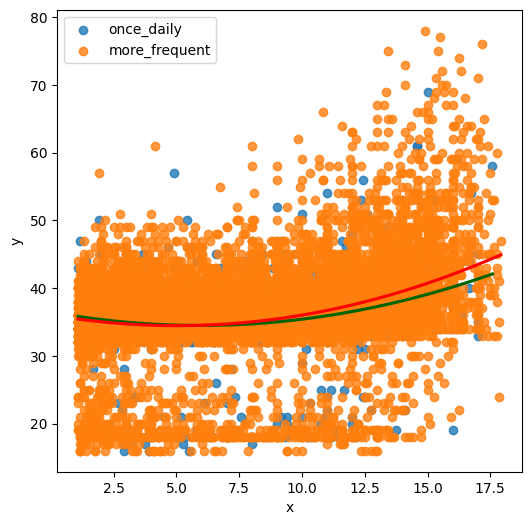

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import make_interp_spline


# Separate data based on feeding frequency
once_daily = df1[df1['df_feedings_per_day'] == 1]
more_frequent = df1[df1['df_feedings_per_day'] >1]

# Separate data based on Breed Type
once_daily_pure = df1[(df1['df_feedings_per_day'] == 1) & (df1['dd_breed_pure_or_mixed'] == 1)]
once_daily_mixed = df1[(df1['df_feedings_per_day'] == 1) & (df1['dd_breed_pure_or_mixed'] == 2)]
more_frequent_pure = df1[(df1['df_feedings_per_day'] > 1) & (df1['dd_breed_pure_or_mixed'] == 1)]
more_frequent_mixed = df1[(df1['df_feedings_per_day'] > 1) & (df1['dd_breed_pure_or_mixed'] == 2)]


fig, ax = plt.subplots(figsize=(6, 6))
# add the plots for each dataframe
sns.regplot(x=once_daily["dd_age_years"], y=once_daily["cslb_score"], data=once_daily,line_kws=dict(color= 'darkgreen'), fit_reg=True, ci=None, ax=ax, label='once_daily',order = 2,)
sns.regplot(x=more_frequent["dd_age_years"], y=more_frequent["cslb_score"], data=more_frequent, line_kws=dict(color="r"), fit_reg=True, ci=None, ax=ax, label='more_frequent', order = 2)
ax.set(ylabel='y', xlabel='x')
ax.legend()
plt.show()

# Count the occurrences of '1 and '2' in the column

In [ ]:
# Count the occurrences of 'True' and 'False' in the column
counts = df1["dd_breed_pure_or_mixed"].value_counts()

# Calculate the percentage of 'True' and 'False'
percentage_true = (counts.get(2, 0) /len(df1))* 100
percentage_false = (counts.get(1, 0) /len(df1)) * 100

print(f"Percentage of '1': {percentage_true:.2f}%")
print(f"Percentage of '2': {percentage_false:.2f}%")

Percentage of '1': 53.84%
Percentage of '2': 46.16%


In [ ]:
# once_daily.head()

In [ ]:
# more_frequent.head()

# Grouping

In [ ]:
once_daily_pure_agg = once_daily_pure.groupby(['dog_id','dd_age_years','df_feedings_per_day','dd_sex', 'dd_weight_lbs', ])['cslb_score'].mean().reset_index()
once_daily_mixed_agg = once_daily_mixed.groupby(['dog_id','dd_age_years','df_feedings_per_day','dd_sex', 'dd_weight_lbs',])['cslb_score'].mean().reset_index()
more_frequent_pure_agg = more_frequent_pure.groupby(['dog_id','dd_age_years','df_feedings_per_day','dd_sex', 'dd_weight_lbs',])['cslb_score'].mean().reset_index()
more_frequent_pure_agg = more_frequent_pure.groupby(['dog_id','dd_age_years','df_feedings_per_day','dd_sex', 'dd_weight_lbs',])['cslb_score'].mean().reset_index()

In [ ]:
once_daily_pure_df = once_daily_pure_agg.set_index(['dog_id'])
once_daily_mixed_df = once_daily_pure_agg.set_index(['dog_id'])
more_frequent_pure_df = more_frequent_pure_agg.set_index(['dog_id'])
more_frequent_mixed_df = more_frequent_pure_agg.set_index(['dog_id'])

In [ ]:
once_daily_pure_df.head()

,dd_age_years,df_feedings_per_day,dd_sex,dd_weight_lbs,cslb_score
dog_id,,,,,
239,8.333333,1,2,77.4,35.0
403,8.250000,1,2,19.0,38.0
634,5.083333,1,2,83.0,34.0
759,4.500000,1,2,48.0,34.0
766,4.333333,1,1,32.0,37.0


In [ ]:
once_daily_pure_df.shape

(678, 5)

In [ ]:
# more_frequent_pure_df.head()

In [ ]:
more_frequent_mixed_df.shape

(9383, 5)

# Our Regression model is:
$$ y=w_{1}x^{1}+w_{0}$$



*   y = target variable (CSLB)
*   x is our multiple feaures(x1,x2,3,x4.. ....)
*   w1,w2,w3,w4...  ... are the slope and w0 is the intercept

# Regression 1

In [ ]:
Y1 = df1['cslb_score']
X1 = df1[['dd_age_years','dd_sex', 'dd_weight_lbs']]

In [ ]:
# X1, Y1

(        dd_age_years  dd_sex  dd_weight_lbs
 dog_id                                     
 10509      16.333333       2           33.0
 74227       1.833333       2           44.0
 32487      13.000000       1           20.0
 63150      13.000000       1           65.0
 33369       2.166667       1           34.8
 ...              ...     ...            ...
 89372       4.250000       1           11.7
 12758       9.583333       2            8.0
 4024        3.750000       1           15.5
 33783       3.000000       1           15.0
 6530       13.416667       1           51.0
 
 [21796 rows x 3 columns],
 dog_id
 10509    35
 74227    34
 32487    35
 63150    44
 33369    34
          ..
 89372    38
 12758    37
 4024     46
 33783    21
 6530     48
 Name: cslb_score, Length: 21796, dtype: int64)

spliting of data 80:20

In [ ]:
X1_train,X1_test, Y1_train, Y1_test = train_test_split(X1, Y1, test_size = 0.2, random_state = 42)

In [ ]:
X1_train, X1_test, Y1_train, Y1_test

(        dd_age_years  dd_sex  dd_weight_lbs
 dog_id                                     
 47836      11.916667       2           23.0
 76138      11.916667       2           78.0
 23124       6.333333       1           48.0
 66552       5.416667       1           55.0
 76564       5.166667       1           58.0
 ...              ...     ...            ...
 15249       8.166667       1           39.0
 91253       1.666667       1           56.0
 272         3.166667       2           55.0
 98563       9.000000       1           21.2
 88109      10.000000       1           23.9
 
 [17436 rows x 3 columns],
         dd_age_years  dd_sex  dd_weight_lbs
 dog_id                                     
 20057       3.250000       1           55.0
 81147       6.000000       2           53.0
 80572      15.000000       1           12.0
 69969      13.916667       1          109.5
 4620       10.083333       2           44.2
 ...              ...     ...            ...
 10723       2.833333     

In [ ]:
reg_model1 = linear_model.LinearRegression()

In [ ]:
model = LinearRegression()
model.fit(X1_train, Y1_train)
coeffecients = model.coef_
coeffecients
#Plot


array([ 0.34553374, -0.17939971, -0.00488879])

### The feature importances (coefficients) are obtained from the coef_ attribute of the linear regression model.

In [ ]:
#Fitting the Multiple Linear Regression model
reg_model1 = LinearRegression().fit(X1_train, Y1_train)

In [ ]:
#Printing the model coefficients
print('Intercept: ',reg_model1.intercept_)
# pair the feature names with the coefficients
list(zip(X1, reg_model1.coef_))

Intercept:  34.47090611520537


[('dd_age_years', 0.22054645584124707),
 ('dd_sex', -0.08729831430263951),
 ('dd_weight_lbs', -0.010969296096355136)]

In [ ]:
reg_model1.score(X1_train, Y1_train), reg_model1.score(X1_test, Y1_test)
#this returns the coefficient of determination(Rsquare) for the data passed. In this case, the training data yields a slightly higher coefficient.

(0.03735067446458973, 0.028455354050211823)

In [ ]:
#Predicting the Test and Train set result
y_pred= reg_model1.predict(X1_test)
x_pred= reg_model1.predict(X1_train)

In [ ]:
print("Prediction for test set: {}".format(y_pred))

Prediction for test set: [35.80540787 34.3667674  35.3740456  34.94247132 34.40890378 36.41750128
 35.13422568 34.47753309 35.06826818 35.95860976 34.61860515 36.62030605
 35.25193268 35.52690827 36.07666082 36.08937091 35.21960505 36.62003712
 36.54087406 36.33955567 36.72302498 35.16839641 35.9352205  37.06253829
 35.91255992 34.89399809 36.83271794 35.79580144 36.94402749 34.5825936
 34.39599205 34.18194236 34.27967142 34.78447105 34.71894541 36.3482039
 35.3639467  36.04319386 36.66805429 35.95417964 34.81439949 34.12989121
 36.02442554 35.90740112 35.65494139 35.74865467 35.94771858 34.46532514
 36.05583736 35.80271855 36.20783632 35.45277381 34.6291601  36.43297881
 34.35020745 36.03038445 35.35334566 34.73475917 34.99971699 34.77023217
 36.42505871 35.83756957 36.19301717 36.34331772 35.08519638 36.65083595
 34.2770669  34.427697   35.93927269 35.0387958  35.89970141 35.36845495
 34.45317711 34.70652544 35.44267491 35.6583951  35.4459445  34.62514433
 35.20142852 37.15308499 35.

In [ ]:
x_pred

array([37.62760545, 34.27710631, 34.68603752, ..., 35.04918482,
       35.89953549, 34.75168738])

In [ ]:
reg_model1_diff = pd.DataFrame({'Actual value': Y1_test, 'Predicted value': y_pred})
reg_model1_diff

,Actual value,Predicted value
dog_id,,
39058,36,35.805408
51240,36,34.366767
60250,35,35.374046
18379,35,34.942471
83640,33,34.408904
...,...,...
90121,32,34.939673
60990,34,35.190381
63644,34,34.730573


# Intercept and Coef for reg 1

In [ ]:
m1 = reg_model1.coef_[0]
c1 = reg_model1.intercept_

In [ ]:
m1,c1

(0.22054645584124707, 34.47090611520537)



---



---



# Regression 2

In [ ]:
Y2 = more_frequent['cslb_score']
X2 = more_frequent[['dd_age_years','dd_sex', 'dd_weight_lbs']]


In [ ]:
X2,Y2

(        dd_age_years  dd_sex  dd_weight_lbs
 dog_id                                     
 10509      16.333333       2           33.0
 74227       1.833333       2           44.0
 32487      13.000000       1           20.0
 63150      13.000000       1           65.0
 33369       2.166667       1           34.8
 ...              ...     ...            ...
 89372       4.250000       1           11.7
 12758       9.583333       2            8.0
 4024        3.750000       1           15.5
 33783       3.000000       1           15.0
 6530       13.416667       1           51.0
 
 [20178 rows x 3 columns],
 dog_id
 10509    35
 74227    34
 32487    35
 63150    44
 33369    34
          ..
 89372    38
 12758    37
 4024     46
 33783    21
 6530     48
 Name: cslb_score, Length: 20178, dtype: int64)

In [ ]:
X2_train,X2_test, Y2_train, Y2_test = train_test_split(X2, Y2, test_size = 0.2, random_state = 100)

In [ ]:
X2_train, X2_test, Y2_train, Y2_test

(        dd_age_years  dd_sex  dd_weight_lbs
 dog_id                                     
 88268      10.833333       1           25.0
 95856       3.250000       1           81.0
 5452        1.833333       1           70.0
 88361      10.500000       2           35.0
 69526      11.666667       1           19.8
 ...              ...     ...            ...
 16508      10.916667       1           89.0
 90391       1.416667       2          115.0
 87395      10.333333       1           58.0
 86702       8.000000       2           18.0
 14972      11.416667       1           71.0
 
 [16142 rows x 3 columns],
         dd_age_years  dd_sex  dd_weight_lbs
 dog_id                                     
 67613       7.083333       2           13.0
 77020      13.416667       2           25.0
 52279       6.333333       1           78.0
 68184       4.500000       2           27.0
 83698       1.333333       1           10.0
 ...              ...     ...            ...
 69619       8.083333     

In [ ]:
reg_model2 = linear_model.LinearRegression()

In [ ]:
#Fitting the Multiple Linear Regression model
reg_model2 = LinearRegression().fit(X2_train, Y2_train)

In [ ]:
#Printing the model coefficients
print('Intercept: ',reg_model2.intercept_)
# pair the feature names with the coefficients
list(zip(X2, reg_model2.coef_))

Intercept:  33.686205124672874


[('dd_age_years', 0.3507580220940005),
 ('dd_sex', -0.18507986098999704),
 ('dd_weight_lbs', -0.004723329552580757)]

In [ ]:
reg_model2.score(X2_train, Y2_train), reg_model2.score(X2_test, Y2_test)
#this returns the coefficient of determination(Rsquare) for the data passed. In this case, the training data yields a slightly higher coefficient.

(0.08058933493000386, 0.09998301141101473)

# Model 2 Intercept and Coef

In [ ]:
#Predicting the Test and Train set result
y_pred= reg_model2.predict(X2_test)
x_pred= reg_model2.predict(X2_train)

In [ ]:
m2 = reg_model2.coef_[0]
c2 = reg_model2.intercept_
m2,c2

(0.3507580220940005, 33.686205124672874)

In [ ]:
print("Prediction for test set: {}".format(y_pred))

Prediction for test set: [35.73917811 37.90396563 35.35417303 ... 34.50591184 34.77779026
 38.43802379]


In [ ]:
x_pred

array([37.1829206 , 34.25849914, 33.81354857, ..., 36.85167171,
       36.03708965, 37.17025628])

In [ ]:
reg_model2_diff = pd.DataFrame({'Actual value': Y2_test, 'Predicted value': y_pred})
reg_model2_diff

,Actual value,Predicted value
dog_id,,
67613,35,35.739178
77020,38,37.903966
52279,42,35.354173
68184,35,34.766927
83698,34,33.921569
...,...,...
69619,37,36.058290
47138,34,38.201042
26569,34,34.505912


In [ ]:
reg_model2_diff_pred = pd.DataFrame(data = reg_model2_diff['Predicted value'])
reg_model1_diff_pred = pd.DataFrame(data = reg_model1_diff['Predicted value'])
reg_model1_diff_pred.head()

,Predicted value
dog_id,
39058,35.805408
51240,34.366767
60250,35.374046
18379,34.942471
83640,34.408904


# Comparison

In [ ]:
#Model_1 Regression 1

import statsmodels.api as sm
model1 = sm.OLS(Y1_train, sm.add_constant(X1_train)).fit()

In [ ]:
#Regression 2

import statsmodels.api as sm
model2 = sm.OLS(Y2_train, sm.add_constant(X2_train)).fit()

In [ ]:
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:             cslb_score   R-squared:                       0.037
Model:                            OLS   Adj. R-squared:                  0.035
Method:                 Least Squares   F-statistic:                     16.68
Date:                Sun, 17 Dec 2023   Prob (F-statistic):           1.23e-10
Time:                        15:21:12   Log-Likelihood:                -3862.1
No. Observations:                1294   AIC:                             7732.
Df Residuals:                    1290   BIC:                             7753.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            34.4709      0.581     59.355

In [ ]:
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:             cslb_score   R-squared:                       0.081
Model:                            OLS   Adj. R-squared:                  0.080
Method:                 Least Squares   F-statistic:                     471.5
Date:                Sun, 17 Dec 2023   Prob (F-statistic):          1.04e-293
Time:                        15:21:12   Log-Likelihood:                -48142.
No. Observations:               16142   AIC:                         9.629e+04
Df Residuals:                   16138   BIC:                         9.632e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            33.6862      0.164    205.409

In [ ]:
# Compare R-squared values or other metrics
print("\nR-squared for Model 1:", model1.rsquared)
print("R-squared for Model 2:", model2.rsquared)


R-squared for Model 1: 0.03735067446458995
R-squared for Model 2: 0.08058933493000364


In [ ]:
y_pred1 = model1.predict(sm.add_constant(X1_test))

y_pred2 = model2.predict(sm.add_constant(X2_test))

In [ ]:
# Compare test performance using metrics like RMSE, MAE, etc.
# Evaluate and compare residuals between the models
resid1 = Y1_test - y_pred1
resid2 = Y2_test - y_pred2
# Compare the residuals for both models


In [ ]:
resid1

dog_id
39058    0.194592
51240    1.633233
60250   -0.374046
18379    0.057529
83640   -1.408904
           ...   
90121   -2.939673
60990   -1.190381
63644   -0.730573
17319    4.012332
4674    -0.101501
Length: 324, dtype: float64

In [ ]:
resid2

dog_id
67613   -0.739178
77020    0.096034
52279    6.645827
68184    0.233073
83698    0.078431
           ...   
69619    0.941710
47138   -4.201042
26569   -0.505912
90555   -0.777790
77933    1.561976
Length: 4036, dtype: float64

In [ ]:
import statsmodels.api as sm
alpha = 0.05 # 95% confidence interval
lr = sm.OLS(Y1_train, sm.add_constant(X1_train.astype(float))).fit()
conf_interval = lr.conf_int(alpha)
print(conf_interval)

                       0          1
const          33.331565  35.610247
dd_age_years    0.152041   0.289052
dd_sex         -0.611223   0.436626
dd_weight_lbs  -0.020432  -0.001506


# Visualizing regression models

In [ ]:
# https://seaborn.pydata.org/archive/0.11/tutorial/regression.html
# https://aegis4048.github.io/mutiple_linear_regression_and_visualization_in_python


In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

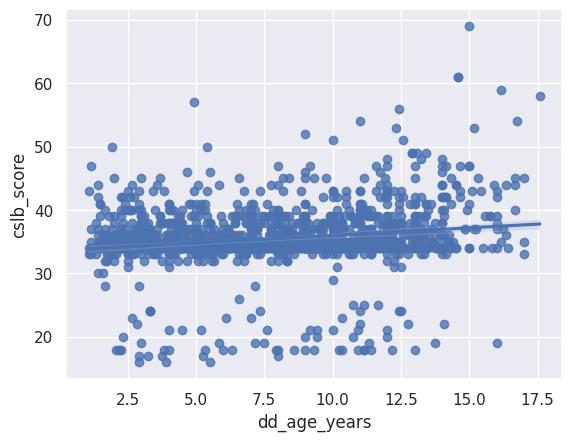

In [ ]:

sns.regplot(x=once_daily["dd_age_years"], y= once_daily['cslb_score'], data= once_daily, scatter=True, fit_reg=True);

In [ ]:
df1['dd_age_years'] = df1['dd_age_years'].astype(int)

In [ ]:
sns.lmplot(x=df1["dd_age_years"], y= df1['cslb_score'], data= df1)

KeyError: ignored

In [ ]:
X1.size

65388

In [ ]:
Y1.size

21796

Fitting Linear Regression Line

y = 0.36197 * x + 33.13096


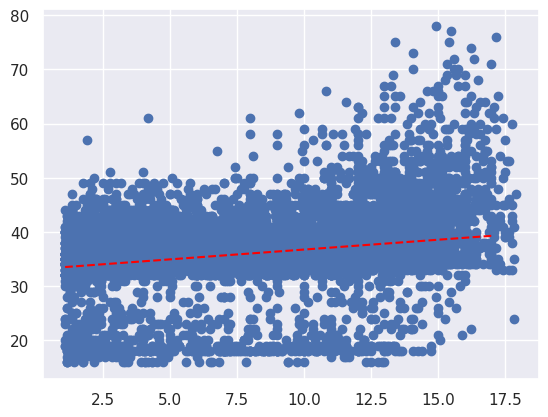

In [ ]:
from numpy import arange
from pandas import read_csv
from scipy.optimize import curve_fit
from matplotlib import pyplot

# define the true objective function
def objective(x, a, b):
 return a * x + b


data = df1.values
# choose the input and output variables
x, y = more_frequent["dd_age_years"], more_frequent['cslb_score']
# curve fit
popt, _ = curve_fit(objective, x, y)
# summarize the parameter values
a, b = popt
print('y = %.5f * x + %.5f' % (a, b))
# plot input vs output
pyplot.scatter(x, y)
# define a sequence of inputs between the smallest and largest known inputs
x_line = arange(min(x), max(x), 1)
# calculate the output for the range
y_line = objective(x_line, a, b)
# create a line plot for the mapping function
pyplot.plot(x_line, y_line, '--', color='red')
pyplot.show()

In [ ]:
df1.head(5)

,dd_age_years,dd_sex,dd_weight_lbs,dd_breed_pure_or_mixed,dd_breed_pure,dd_spayed_or_neutered,df_diet_consistency,df_feedings_per_day,df_daily_supplements_omega3,df_primary_diet_component,cslb_score,dd_age_years_log1
dog_id,,,,,,,,,,,,
10509,16.333333,2,33.0,2,0.0,True,1,2,0.0,1,35,2.793208
74227,1.833333,2,44.0,2,0.0,True,1,2,0.0,4,34,0.606136
32487,13.000000,1,20.0,1,159.0,True,1,2,0.0,1,35,2.564949
63150,13.000000,1,65.0,2,0.0,True,1,2,0.0,2,44,2.564949
33369,2.166667,1,34.8,2,0.0,True,1,2,0.0,1,34,0.773190


# Feature  Importance

In [ ]:
!pip install rfpimp

  Preparing metadata (setup.py) ... done
  Created wheel for rfpimp: filename=rfpimp-1.3.7-py3-none-any.whl size=10649 sha256=d8ae442c09cbc3c7d72f3aa6d9bbdd1d3596c0bd2112645fb395b6bd1a6eb67d
  Stored in directory: /root/.cache/pip/wheels/6a/12/08/d5bc35127c8d69d39c1f3736a95419ab4763cc0c80ed65bf41
Successfully built rfpimp


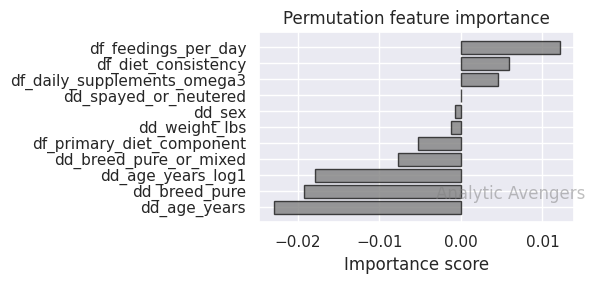

In [ ]:
import rfpimp #A library that provides feature importances, based upon the permutation importance strategy, for general scikit-learn models and implementations specifically for random forest out-of-bag scores.
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

## Data preparation ###

features = ['df_feedings_per_day', 'dd_age_years', 'dd_breed_pure_or_mixed', 'df_diet_consistency', 'dd_sex', 'dd_spayed_or_neutered', 'df_daily_supplements_omega3']

## Train/test split ##

df1_train, df1_test = train_test_split(df1, test_size=0.20)
df_train = df1_train[features]
df_test = df1_test[features]

X_train, y_train = df1_train.drop('cslb_score',axis=1), df1_train['cslb_score']
X_test, y_test = df1_test.drop('cslb_score',axis=1), df1_test['cslb_score']

### Train ##

rf = RandomForestRegressor(n_estimators=100, n_jobs=-1)
rf.fit(X_train, y_train)

##### Permutation feature importance ####

imp = rfpimp.importances(rf, X_test, y_test)

### Plot ###

fig, ax = plt.subplots(figsize=(6, 3))

ax.barh(imp.index, imp['Importance'], height=0.8, facecolor='grey', alpha=0.8, edgecolor='k')
ax.set_xlabel('Importance score')
ax.set_title('Permutation feature importance')
ax.text(0.8, 0.15 ,'Analytic Avengers', fontsize=12, ha='center', va='center',transform=ax.transAxes, color='grey', alpha=0.5)
plt.gca().invert_yaxis()

fig.tight_layout()

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import make_interp_spline

# Separate data based on feeding frequency
once_daily = df1[df1['df_feedings_per_day'] == 1]
more_frequent = df1[df1['df_feedings_per_day'] >1]

In [ ]:
df1.dd_age_years.shape

In [ ]:
# Scatter plot with different colors for feeding frequencies
plt.figure(figsize=(8, 6))
plt.scatter(x='dd_age_years', y= 'cslb_score', data=once_daily, color='blue', label='Once Daily', s = 20)
plt.scatter(x = 'dd_age_years', y='cslb_score', data=more_frequent, color='orange', label='More Frequent', s = 20)
row1 = len(once_daily)
row2 = len(more_frequent)

x1 = np.random.rand(row1) * 10
x2 = np.random.rand(row2) * 10
# Plotting the regression lines
plt.plot(x1,   m1*x1 + c1, color='red', label='Regression 1')

plt.plot(x2, m2*x2 + c2, color='blue', label='Regression 2')

plt.legend()
plt.xlabel('Age')
plt.ylabel('CSLB Scores')
plt.title('Scatter plot with two regression lines')
plt.show()
